# Format transformer input to reduce dimensionality and for temporal order

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA

In [2]:
%matplotlib inline

## Combined file

In [3]:
root = '/mnt/labNAS/usv_calls/usv_note_analysis/03_div_cage_group01_18_song_empty'

In [4]:
file_dir = 'all detections file'
filename = 'locations_latents_all.csv'
locations_latents_all = pd.read_csv(os.path.join(root,file_dir,filename))
locations_latents_all

,Unnamed: 0,start,end,duration,maxfreq,maxamp,meanfreq,cvfreq,in_song,usvseg_index,...,22,23,24,25,26,27,28,29,30,31
0,0.0,0.499500,0.573000,43.500000,33.518,-74.43,33.371,0.0732,False,0.0,...,-0.321951,-0.004976,-0.009897,1.071670,-0.048639,0.014466,-0.004134,-0.351411,0.035195,-0.008947
1,1.0,0.599500,0.680400,51.000000,35.249,-73.59,38.586,0.2041,False,1.0,...,0.716621,-0.006194,-0.003253,1.243603,-0.055185,-0.005874,0.004700,-0.595085,0.042283,0.004533
2,2.0,0.664900,0.741900,47.000000,24.462,-65.25,27.155,0.1779,False,0.0,...,-0.149974,-0.040295,0.002160,1.758230,-0.038398,-0.068613,-0.005556,-0.312204,0.076351,0.004217
3,3.0,0.699400,0.781400,52.000000,26.710,-67.75,36.812,0.3191,False,2.0,...,1.128774,-0.019966,0.004840,1.402047,-0.060514,-0.014199,0.022991,-0.611689,0.057459,0.004964
4,4.0,0.801900,0.870900,39.000000,26.129,-58.83,31.683,0.2641,False,3.0,...,-0.687927,-0.004163,0.010576,1.201925,-0.041650,-0.019108,-0.000796,-0.507738,0.073795,0.005437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21832,NaN,3784.295589,3784.354581,0.058993,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.110711,-0.127445,-0.078923,-0.920009,-0.028742,-0.014675,0.007098,1.521373,0.120173,-0.008331
21833,NaN,3784.454569,3784.498564,0.043995,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.215791,-0.097987,-0.106544,-1.091271,-0.055277,0.013731,0.021517,1.565341,0.124663,-0.019403
21834,6044.0,3791.947400,3792.024900,47.500000,20.134,-58.69,20.996,0.0575,False,4666.0,...,-0.847291,-0.075674,-0.061599,-0.845709,-0.039407,-0.055683,0.004596,0.194059,0.024943,0.019616
21835,6045.0,3792.486400,3792.543800,27.500000,20.356,-68.72,22.576,0.0815,False,4667.0,...,-0.500720,-0.052311,-0.025521,-0.018938,-0.024468,-0.055605,-0.043400,0.067176,0.037409,-0.005561


In [5]:
latents = locations_latents_all.iloc[:,-32:]
latents

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.444413,-0.068796,0.019867,0.004896,-0.112710,-0.021696,0.006856,0.026765,0.466714,-0.008059,...,-0.321951,-0.004976,-0.009897,1.071670,-0.048639,0.014466,-0.004134,-0.351411,0.035195,-0.008947
1,-0.361747,-0.052678,0.020286,0.010781,-0.208633,-0.052298,0.006089,0.034626,0.248262,-0.009741,...,0.716621,-0.006194,-0.003253,1.243603,-0.055185,-0.005874,0.004700,-0.595085,0.042283,0.004533
2,0.262894,-0.087700,0.052388,0.026285,0.296551,-0.061815,0.049550,0.032414,0.138628,-0.042505,...,-0.149974,-0.040295,0.002160,1.758230,-0.038398,-0.068613,-0.005556,-0.312204,0.076351,0.004217
3,-0.301541,-0.057079,0.020412,0.002893,-0.734212,-0.066064,0.007412,0.046114,0.224889,-0.012919,...,1.128774,-0.019966,0.004840,1.402047,-0.060514,-0.014199,0.022991,-0.611689,0.057459,0.004964
4,-1.559752,-0.078535,0.045238,0.000786,0.003122,-0.038871,0.041082,0.035756,0.324561,-0.048924,...,-0.687927,-0.004163,0.010576,1.201925,-0.041650,-0.019108,-0.000796,-0.507738,0.073795,0.005437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21832,-0.150430,-0.073959,0.091809,-0.019210,-1.638502,0.029576,0.017005,0.036875,-1.293412,-0.064374,...,-0.110711,-0.127445,-0.078923,-0.920009,-0.028742,-0.014675,0.007098,1.521373,0.120173,-0.008331
21833,-0.184971,-0.084169,0.075257,-0.003179,-2.151803,0.026579,0.012770,0.074946,-0.710397,-0.056463,...,-0.215791,-0.097987,-0.106544,-1.091271,-0.055277,0.013731,0.021517,1.565341,0.124663,-0.019403
21834,1.218073,-0.066497,0.020548,0.029020,-1.137237,0.017310,-0.025721,0.045674,-0.692654,-0.061453,...,-0.847291,-0.075674,-0.061599,-0.845709,-0.039407,-0.055683,0.004596,0.194059,0.024943,0.019616
21835,0.330739,-0.059126,0.042853,-0.000864,-0.092397,-0.001019,0.013647,0.005028,-1.241493,-0.035127,...,-0.500720,-0.052311,-0.025521,-0.018938,-0.024468,-0.055605,-0.043400,0.067176,0.037409,-0.005561


## Perform PCA

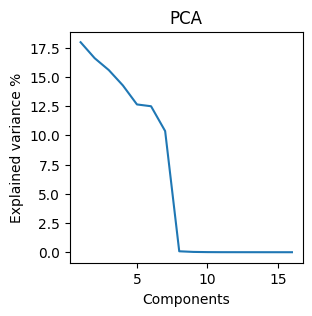

In [6]:
n_comp = 32
show = n_comp//2

# Fit PCA
pca = PCA(n_components=n_comp)
PCs = pca.fit_transform(latents)

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(3, 3))
plt.plot(np.arange(1,show+1),100*explained_variance_ratio[:show])
plt.xlabel('Components')
plt.ylabel('Explained variance %')
plt.title('PCA')
#plt.savefig('scree_plot.eps',bbox_inches='tight',format='eps',dpi=300)
plt.show()

## Append PCs

In [7]:
keep = 7
col_names = ['PC'+str(i) for i in range(keep)]
PC_df = pd.DataFrame(PCs[:,:keep],columns=col_names)
PC_df

,PC0,PC1,PC2,PC3,PC4,PC5,PC6
0,0.717510,-0.522742,-1.307682,0.059345,-0.376843,0.400495,-0.059458
1,0.586668,-1.134983,-0.822131,0.568763,0.465572,-0.102572,-0.020166
2,-0.328627,-2.125458,0.666226,-0.361660,0.391479,0.357780,1.062925
3,0.275302,-1.524213,-0.706611,0.880463,0.696566,-0.624024,0.313137
4,0.627322,-1.313633,-0.167468,0.844186,-1.017211,0.821897,0.586765
...,...,...,...,...,...,...,...
21832,-2.071356,0.686846,0.309391,0.771220,-0.979996,-1.183707,-0.345531
21833,-1.611270,1.552306,-1.113446,0.761229,-1.232918,-1.311764,-0.527010
21834,-0.746720,0.371962,0.574783,-0.943561,-0.809392,-1.660682,0.061499
21835,-0.670753,-0.652383,1.090558,-0.354348,-0.554511,-0.532835,-0.434645


In [8]:
locations_latents_all_PC = pd.concat([locations_latents_all, PC_df],axis=1)
locations_latents_all_PC

,Unnamed: 0,start,end,duration,maxfreq,maxamp,meanfreq,cvfreq,in_song,usvseg_index,...,29,30,31,PC0,PC1,PC2,PC3,PC4,PC5,PC6
0,0.0,0.499500,0.573000,43.500000,33.518,-74.43,33.371,0.0732,False,0.0,...,-0.351411,0.035195,-0.008947,0.717510,-0.522742,-1.307682,0.059345,-0.376843,0.400495,-0.059458
1,1.0,0.599500,0.680400,51.000000,35.249,-73.59,38.586,0.2041,False,1.0,...,-0.595085,0.042283,0.004533,0.586668,-1.134983,-0.822131,0.568763,0.465572,-0.102572,-0.020166
2,2.0,0.664900,0.741900,47.000000,24.462,-65.25,27.155,0.1779,False,0.0,...,-0.312204,0.076351,0.004217,-0.328627,-2.125458,0.666226,-0.361660,0.391479,0.357780,1.062925
3,3.0,0.699400,0.781400,52.000000,26.710,-67.75,36.812,0.3191,False,2.0,...,-0.611689,0.057459,0.004964,0.275302,-1.524213,-0.706611,0.880463,0.696566,-0.624024,0.313137
4,4.0,0.801900,0.870900,39.000000,26.129,-58.83,31.683,0.2641,False,3.0,...,-0.507738,0.073795,0.005437,0.627322,-1.313633,-0.167468,0.844186,-1.017211,0.821897,0.586765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21832,NaN,3784.295589,3784.354581,0.058993,NaN,NaN,NaN,NaN,NaN,NaN,...,1.521373,0.120173,-0.008331,-2.071356,0.686846,0.309391,0.771220,-0.979996,-1.183707,-0.345531
21833,NaN,3784.454569,3784.498564,0.043995,NaN,NaN,NaN,NaN,NaN,NaN,...,1.565341,0.124663,-0.019403,-1.611270,1.552306,-1.113446,0.761229,-1.232918,-1.311764,-0.527010
21834,6044.0,3791.947400,3792.024900,47.500000,20.134,-58.69,20.996,0.0575,False,4666.0,...,0.194059,0.024943,0.019616,-0.746720,0.371962,0.574783,-0.943561,-0.809392,-1.660682,0.061499
21835,6045.0,3792.486400,3792.543800,27.500000,20.356,-68.72,22.576,0.0815,False,4667.0,...,0.067176,0.037409,-0.005561,-0.670753,-0.652383,1.090558,-0.354348,-0.554511,-0.532835,-0.434645


## Transform null vector

In [9]:
empty_latent = np.load('empty_latent.npy')
empty_PC = pca.transform(empty_latent[np.newaxis,:])

/home/vafeidis/.conda/envs/behavior/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


## Correct to global times and reorder

In [10]:
time0 = locations_latents_all[locations_latents_all.hour==0].iloc[0].time
time1 = locations_latents_all[locations_latents_all.hour==1].iloc[0].time
time2 = locations_latents_all[locations_latents_all.hour==2].iloc[0].time

In [11]:
dt1 = pd.to_datetime(time1) - pd.to_datetime(time0); dt1 = dt1.total_seconds()
dt2 = pd.to_datetime(time2) - pd.to_datetime(time0); dt2 = dt2.total_seconds()

In [12]:
locations_latents_all_PC.loc[locations_latents_all_PC.hour==1,'start'] += dt1
locations_latents_all_PC.loc[locations_latents_all_PC.hour==1,'end'] += dt1
locations_latents_all_PC.loc[locations_latents_all_PC.hour==2,'start'] += dt2
locations_latents_all_PC.loc[locations_latents_all_PC.hour==2,'end'] += dt2

In [13]:
locations_latents_all_PC_tOrd = locations_latents_all_PC.sort_values('start',ascending=True)
locations_latents_all_PC_tOrd

,Unnamed: 0,start,end,duration,maxfreq,maxamp,meanfreq,cvfreq,in_song,usvseg_index,...,29,30,31,PC0,PC1,PC2,PC3,PC4,PC5,PC6
50,0.0,34.0269,34.0754,18.5,44.183,-65.75,44.077,0.0087,False,1.0,...,0.428792,0.039799,0.006960,0.006739,0.977707,-0.141563,0.042796,0.440698,0.288077,-0.510929
145,1.0,74.4708,74.5123,11.5,38.029,-78.09,37.795,0.0145,False,3.0,...,1.155355,0.077776,-0.025545,-0.638671,0.724390,-2.106694,0.040624,0.104273,0.921153,-1.421323
166,2.0,76.5595,76.6045,15.0,55.886,-65.86,54.384,0.0245,False,4.0,...,1.253433,0.080747,-0.014404,-1.170408,0.709862,-1.518692,-0.098761,0.061285,-0.054401,-0.005853
422,3.0,111.6823,111.7418,29.5,26.939,-60.54,58.766,0.4913,False,9.0,...,2.409194,0.182437,-0.026481,-0.712338,4.020279,-3.829976,-1.988206,0.358125,1.697964,1.419212
517,4.0,127.8276,127.9046,47.0,93.390,-64.00,88.576,0.1640,False,10.0,...,-0.037743,0.034853,-0.009210,0.670138,1.136730,-1.469341,-1.299252,-0.274203,0.409669,-1.821249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21510,7840.0,11224.1787,11224.2362,27.5,32.910,-68.79,32.675,0.0371,False,4915.0,...,0.057401,0.076289,-0.024191,0.341119,-0.749848,-1.798257,0.491561,-1.374225,0.981494,0.033157
21511,7841.0,11225.8775,11225.9490,41.5,93.022,-63.69,59.064,0.3848,False,4916.0,...,0.624736,0.078449,-0.029973,-0.694538,0.575053,-1.677101,0.346821,-1.190022,-1.594036,0.652577
21512,7842.0,11226.1369,11226.1909,24.0,30.779,-74.74,31.010,0.0386,False,4917.0,...,0.033787,0.114910,-0.031770,-0.067637,-1.657916,-2.257497,0.076976,-1.985107,0.889843,-0.533184
21514,7843.0,11249.4906,11249.5741,53.5,29.121,-73.04,30.540,0.0835,False,4918.0,...,-0.483509,0.112458,-0.031335,-0.006437,-2.444950,-2.264534,-0.242702,-0.689967,-0.272480,-0.158396


## Save

In [14]:
np.savez(os.path.join(root,file_dir,'empty_latent.npz'),latent=empty_latent,PCs=empty_PC[0,:keep])
locations_latents_all_PC_tOrd.to_csv(os.path.join(root,file_dir,'locations_latents_all_PC_tOrd.csv'), index=False)